## Import Module

In [52]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## IMDB dataset 불러오기

In [53]:
NUM_WORDS=10000 # 가장 많이 사용된 상위 10000개의 단어만 추출
(train_x, train_y), (test_x, test_y) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

In [54]:
## 데이터 확인해보기
train_x[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

## 문장 decoder 만들기

In [55]:
INDEX_FROM=3
word_to_id = keras.datasets.imdb.get_word_index() #단어 -> 숫자 딕셔너리

## 딕셔너리 키, 밸류 바꾸기

In [56]:
k={'a':1,'b':2,'c':3}
k.items()
k2 = {}
# for i,j in k.items():
#     k2[j]=i
k2 = {j:i for i,j in k.items()} # 리스트 컴프리헨션
k2

{1: 'a', 2: 'b', 3: 'c'}

## Word_to_id에 키값 추가

In [57]:
INDEX_FROM = 3
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"]=0
word_to_id["<START>"]=1
word_to_id["<UNK>"]=2
word_to_id["<UNSUED>"]=3

## id_to_word 딕셔너리 만들기

In [58]:
id_to_word = {v:k for k,v in word_to_id.items()}

## 디코더 함수 만들기

In [59]:
def decode(sequence):
    print(' '.join(id_to_word[id] for id in sequence))

In [60]:
decode(test_x[0])

<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss


In [ ]:
test_y[0]

0

## 데이터 전처리

In [61]:
## 데이터 전처리
## 길이 256개의 단어로 통일
## 문장이 일찍 끝났을 경우 0값을 집어넣어 제로패딩
train_x=keras.preprocessing.sequence.pad_sequences(train_x, value=0, padding='post', maxlen=256)
test_x=keras.preprocessing.sequence.pad_sequences(test_x, value=0, padding='post', maxlen=256)

## Fully Connected Neural NEtwork로 문장분류하기

In [ ]:
model = keras.Sequential([
                        keras.layers.Embedding(input_dim=NUM_WORDS, output_dim=2,input_length=256),
                        keras.layers.Flatten(), #입력노드에 넣기위해 다 펼치기
                        keras.layers.Dropout(0.5),
                        keras.layers.Dense(5, activation='relu'),
                        keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 2)            20000     
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 5)                 2565      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 22,571
Trainable params: 22,571
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(train_x,train_y,
                    epochs=100,
                    batch_size=100,
                    validation_data=(test_x,test_y),
                    callbacks=early_stop)

Epoch 1/100
250/250 [==============================] - 5s 9ms/step - loss: 0.6921 - accuracy: 0.5224 - val_loss: 0.6884 - val_accuracy: 0.5725
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.6008 - accuracy: 0.6981 - val_loss: 0.4468 - val_accuracy: 0.8230
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3843 - accuracy: 0.8374 - val_loss: 0.3354 - val_accuracy: 0.8661
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 0.3187 - accuracy: 0.8651 - val_loss: 0.3082 - val_accuracy: 0.8741
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.2910 - accuracy: 0.8801 - val_loss: 0.2961 - val_accuracy: 0.8791
Epoch 6/100
250/250 [==============================] - 2s 8ms/step - loss: 0.2717 - accuracy: 0.8865 - val_loss: 0.2918 - val_accuracy: 0.8793
Epoch 7/100
250/250 [==============================] - 2s 8ms/step - loss: 0.2575 - accuracy: 0.8954 - val_loss: 0.2891 - val_accuracy: 0.8799

## 임베딩 레이어 살펴보기

In [ ]:
model.layers[1]

In [ ]:
## 학습된 임베딩 레이어만 뽑아내기
embed = keras.backend.function(
    [model.layers[0].input],
    [model.layers[1].output]
)

In [ ]:
embed(test_x[0])[0].shape

(256, 2)

## 시각화

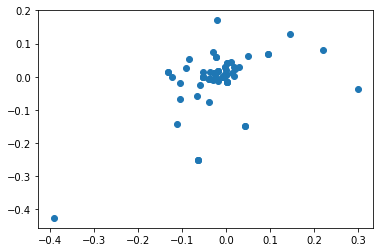

In [ ]:
temp = embed(test_x[0])[0]
plt.scatter(temp[:,0],temp[:,1])

## 긍정, 부정 단어들을 임베딩 벡터로 시각화

In [ ]:
keywords = ['great', 'brilliant','crap','bad', 'fantastic', 'movie', 'seagal','suck','wonderful']
ids=[word_to_id[word] for word in keywords]
ids


[87, 530, 595, 78, 777, 20, 3272, 2777, 389]

In [ ]:
temp = embed(np.array(ids))[0]
temp

array([[ 0.19299829,  0.21479355],
       [ 0.17664649,  0.32963857],
       [-0.20785923, -0.33208618],
       [-0.30096963, -0.24875595],
       [ 0.16790685,  0.36430892],
       [-0.01015463, -0.00785919],
       [-0.3380523 , -0.3382403 ],
       [ 0.08559134, -0.16079344],
       [ 0.22924915,  0.36504197]], dtype=float32)

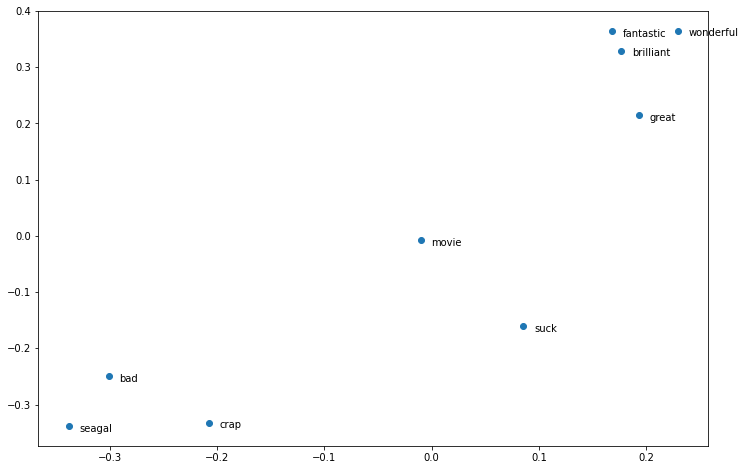

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(temp[:,0], temp[:,1])
for i,j in zip(keywords, temp):
    plt.annotate(i, (j[0]+0.01, j[1]-0.01) )

In [ ]:
for i,j in zip(keywords, temp):
    print(i,j)

great [0.19299829 0.21479355]
brilliant [0.17664649 0.32963857]
crap [-0.20785923 -0.33208618]
bad [-0.30096963 -0.24875595]
fantastic [0.16790685 0.36430892]
movie [-0.01015463 -0.00785919]
seagal [-0.3380523 -0.3382403]
suck [ 0.08559134 -0.16079344]
wonderful [0.22924915 0.36504197]


## Test RNN Layers

In [62]:
rnn=keras.layers.SimpleRNN(1)

In [70]:
x = np.random.rand(1,20,4) # 1-dim: 배치사이즈, 2-dim: sequence, 3-dim: 입력 데이터의 변수
rnn(x)

<tf.Tensor: shape=(1, 20, 1), dtype=float32, numpy=
array([[[0.8520613 ],
        [0.93719834],
        [0.9737593 ],
        [0.9723109 ],
        [0.8926149 ],
        [0.9470812 ],
        [0.95458317],
        [0.9018371 ],
        [0.93205553],
        [0.9293412 ],
        [0.96617043],
        [0.9649234 ],
        [0.80748385],
        [0.7942294 ],
        [0.94939   ],
        [0.89014477],
        [0.91758734],
        [0.9312304 ],
        [0.9797918 ],
        [0.8707068 ]]], dtype=float32)>

In [69]:
rnn=keras.layers.SimpleRNN(1, return_sequences=True)
rnn(x)

<tf.Tensor: shape=(1, 10, 1), dtype=float32, numpy=
array([[[0.69958645],
        [0.90386975],
        [0.9245278 ],
        [0.8051485 ],
        [0.93906236],
        [0.9663567 ],
        [0.7395266 ],
        [0.7937864 ],
        [0.9638782 ],
        [0.9222895 ]]], dtype=float32)>

## Test LSTM layers

In [72]:
lstm = keras.layers.LSTM(1, return_sequences=True)
lstm(x)

<tf.Tensor: shape=(1, 20, 1), dtype=float32, numpy=
array([[[-0.09457965],
        [-0.11764086],
        [-0.254084  ],
        [-0.27832836],
        [-0.23411126],
        [-0.28126964],
        [-0.3913843 ],
        [-0.3263839 ],
        [-0.2527953 ],
        [-0.27409968],
        [-0.25452116],
        [-0.29477316],
        [-0.26785296],
        [-0.27820182],
        [-0.3651337 ],
        [-0.26040313],
        [-0.33364144],
        [-0.20828274],
        [-0.27772337],
        [-0.26775837]]], dtype=float32)>

## 문장분류 모델 만들기

In [79]:
model = keras.Sequential([
                          keras.layers.Embedding(input_dim=10000, output_dim=32, input_length=256),                          
                          keras.layers.Bidirectional(keras.layers.LSTM(32)),
                          keras.layers.Dense(16,activation='relu'),
                          keras.layers.Dense(8,activation='relu'),
                          keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                      metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 32)           320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_8 (Dense)             (None, 16)                1040      
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 337,825
Trainable params: 337,825
Non-trainable params: 0
________________________________________________

In [80]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(train_x,
                    train_y,
                    epochs=20,
                    batch_size=100,                    
                    validation_data=(test_x,test_y),
                    callbacks=early_stop)

Epoch 1/20
250/250 [==============================] - 41s 151ms/step - loss: 0.4488 - accuracy: 0.7768 - val_loss: 0.3259 - val_accuracy: 0.8668
Epoch 2/20
250/250 [==============================] - 37s 147ms/step - loss: 0.2329 - accuracy: 0.9138 - val_loss: 0.3103 - val_accuracy: 0.8738
Epoch 3/20
250/250 [==============================] - 37s 147ms/step - loss: 0.1734 - accuracy: 0.9379 - val_loss: 0.3322 - val_accuracy: 0.8654
Epoch 4/20
250/250 [==============================] - 39s 156ms/step - loss: 0.1391 - accuracy: 0.9533 - val_loss: 0.3839 - val_accuracy: 0.8658
Epoch 5/20
250/250 [==============================] - 37s 147ms/step - loss: 0.1146 - accuracy: 0.9620 - val_loss: 0.4429 - val_accuracy: 0.8511
Epoch 6/20
250/250 [==============================] - 37s 147ms/step - loss: 0.1095 - accuracy: 0.9633 - val_loss: 0.4409 - val_accuracy: 0.8558


train_x